### Model showing the probability of someone buying a car Based off of their Age and Estimated Salary
## *Using Linear Regression(Binary Classification)
# Charles James

In [1]:
#imported libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import datafile using pandas read_csv and display the data
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [3]:
#Print the first 10 rows
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [4]:
#Show the number of missing data for each column (Examples: NAN, NaN, na)
#Here we check to see if any of the columns in the csv has missing data. 
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
#Dimensions of the dataframe
data.shape

(400, 5)

In [6]:
#Specific information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [7]:
#Find the amount of each binary classification. 0 = no; 1 = yes
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

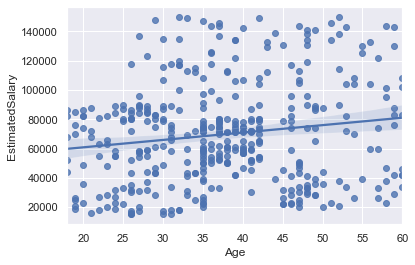

In [8]:
#Visualization of the 'Age' and 'EstimatedSalary' columns
sns.set_theme(color_codes=True)
sns.regplot(x="Age", y="EstimatedSalary", data=data);

In [9]:
#Set proper values for x and y to train the model properly X is set for Age and Estimated Salary while y is set for the purchased column. 
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [10]:
from sklearn.model_selection import train_test_split

#Split the data on the 'Age' and Purchased columns 90% training/ 10% testing
#X_train, X_test, y_train, y_test = train_test_split(data[['Age']], data.Purchased, test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
#Show the values in x_train
#X_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
#Import LogeisticRegression to create our model 
from sklearn.linear_model import LogisticRegression

In [13]:
#Create an object of this class
model = LogisticRegression()

In [14]:
#Fit and train the data using the training data
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Prediction of the model's training data
print(model.predict(X_train))

[0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0]


In [16]:
#Actual values of training data
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [17]:
#Evaluate the model on the training data set
#imports
#Classification report is used to measure the quality of predictions from a classification algorithm
from sklearn.metrics import classification_report
#A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred = model.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print('True Positive | False Positive')
print('False Negative | True Negative')
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       189
           1       0.82      0.68      0.74       111

    accuracy                           0.82       300
   macro avg       0.82      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300


Confusion Matrix: 
 [[172  17]
 [ 36  75]]
True Positive | False Positive
False Negative | True Negative

Accuracy:  0.8233333333333334


In [18]:
#Prediction of the model's test data
print(model.predict(X_test))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [19]:
#Actual values of test data
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [20]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('True Positive | False Positive')
print('False Negative | True Negative')
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100


Confusion Matrix: 
 [[65  3]
 [ 8 24]]
True Positive | False Positive
False Negative | True Negative

Accuracy:  0.89


# 